# Chapter-1

## 简介

  > The new form of the prolem can be described in terms of a game which we call the "imitation game". It is played with three people,
a man(A), a woman(B), and an interroagtor(C) who may be of either sex. The interragator stays in a room a part fron the other tow.The
object of the game for the interrogator is to determine which of the other two is the man and which is the woman.
    We now ask the question, "What will happen when a machine takes the part A in this game?" Will the interrogator decide wrongly 
as often when the game is played like this as he does when the game is played between a man and a woman ? These questions replace our original, 
"Can machines think?"

- 许多机器学习系统解决的都是无法直接使用固定规则或者流程代码完成的问题。
- 具备“学习”能力的程序都是指它能够不断的从经历和数据中西区经验教训，从而应对未来的预测任务。我们把这种对未知的预测能力叫做泛化力（Generalization）
- 具备不断改善自身应对具体任务的能力。这种完成任务的能力叫性能（Performance）

> 机器学习定义(Tom Mitchell): <br>
A program can be said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T ,as measured by
    P , improves with experience E.

## 良/恶性乳腺癌肿瘤预测

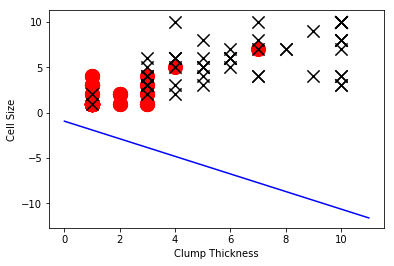

c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy(10 training samples): 0.8685714285714285
[-1.51522787]
[-0.10721332  0.48314152]


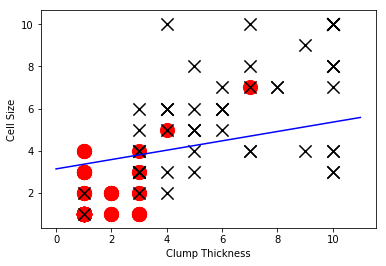

c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy(10 training samples): 0.9371428571428572
[-4.67611309]
[0.59071861 0.7498354 ]


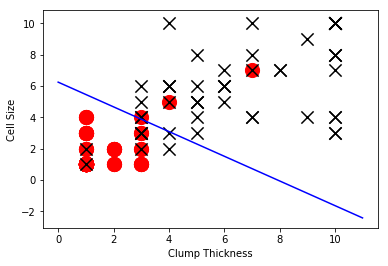

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv('./Datasets/Breast-Cancer/breast-cancer-train.csv')
# print(df_train)

df_test = pd.read_csv('./Datasets/Breast-Cancer/breast-cancer-test.csv')
# print(df_test)

df_test_negative = df_test.loc[df_test['Type'] == 0][[
    'Clump Thickness', 'Cell Size'
]]
df_test_positive = df_test.loc[df_test['Type'] == 1][[
    'Clump Thickness', 'Cell Size'
]]
# print(df_test_negative)
# print(df_test_positive)

plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

# 绘制随机直线
# 截距
intercept = np.random.random([1])
# 系数
coef = np.random.random([2])
# print(intercept)
# print(coef)
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
plt.plot(lx, ly, c='blue')

# 第一次绘制，随意一条直线
plt.show()

# =====================引入逻辑斯蒂回归分类器：使用一小部分的训练集的数据看看初步效果=============================
lr = LogisticRegression()
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy(10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']],df_test['Type']))

intercept = lr.intercept_
coef = lr.coef_[0,:]
print(intercept)
print(coef)
ly = (-intercept - lx * coef[0]) / coef[1]


plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.plot(lx, ly, c='blue')
# 引入逻辑回归算法生成的系数之后，虽然只用了小部分的训练数据，但区分效果已经好多了
plt.show()



# =====================引入逻辑斯蒂回归分类器：使用全部的训练集的数据看看最终效果=============================
lr = LogisticRegression()
lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Testing accuracy(10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']],df_test['Type']))

intercept = lr.intercept_
coef = lr.coef_[0,:]
print(intercept)
print(coef)
ly = (-intercept - lx * coef[0]) / coef[1]


plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.plot(lx, ly, c='blue')
# 引入逻辑回归算法生成的系数之后，虽然只用了小部分的训练数据，但区分效果已经好多了
plt.show()



# Chapter-2

## 获取在线数据、清除维度缺失数据

In [64]:
# 导入pandas与numpy工具包。
import pandas as pd
import numpy as np

pd.set_option("max_columns",1000) 
pd.set_option("display.width",400)

# 创建特征列表。
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# 使用pandas.read_csv函数从互联网读取指定数据。
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = column_names )

# 将?替换为标准缺失值表示。
data = data.replace(to_replace='?', value=np.nan)
# 丢弃带有缺失值的数据（只要有一个维度有缺失）。
data = data.dropna(how='any')

# 输出data的数据量和维度。
data.shape
print(data)

     Sample code number  Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
0               1000025                5                        1                         1                  1                            2           1                3                1        1      2
1               1002945                5                        4                         4                  5                            7          10                3                2        1      2
2               1015425                3                        1                         1                  1                            2           2                3                1        1      2
3               1016277                6                        8                         8                  1                            3           4                3                7       

## 线性分类器：逻辑斯蒂回归模型、随机参数估计模型

In [91]:
# 使用sklearn.cross_valiation里的train_test_split模块用于分割数据。
# train_test_split 包路径改了
from sklearn.model_selection import train_test_split

# 随机采样25%的数据用于测试，剩下的75%用于构建训练集合。
X_train, X_test, y_train, y_test = train_test_split(data[column_names[1:10]], data[column_names[10]], test_size=0.25, random_state=33)

print(type(X_train))
print(type(y_train))
print(data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 测试集合里面肿瘤数据统计分布
print(y_train.value_counts())
print(y_test.value_counts())
print("=" * 64)
print(X_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(683, 11)
(512, 9)
(171, 9)
(512,)
(171,)
2    344
4    168
Name: Class, dtype: int64
2    100
4     71
Name: Class, dtype: int64
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses
662                1                        1                         3                  1                            2           1                2                1        1
282                1                        4                         3                 10                            4          10                5                6        1
542                5                        3                         1                  1                            2           1                1                1        1
301                1                        1                         1                  1      

In [94]:
# 从sklearn.preprocessing里导入StandardScaler。
from sklearn.preprocessing import StandardScaler
# 从sklearn.linear_model里导入LogisticRegression与SGDClassifier。
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

[[-1.19196677 -0.68788787 -0.03809494 ... -0.55666054 -0.58626819
  -0.34343195]
 [-1.19196677  0.30608745 -0.03809494 ...  0.68611648  1.09441105
  -0.34343195]
 [ 0.24231522 -0.02523765 -0.72246721 ... -0.97091955 -0.58626819
  -0.34343195]
 ...
 [ 0.24231522 -0.68788787 -0.38028108 ... -0.97091955 -0.58626819
  -0.34343195]
 [-1.19196677 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 0.95945621 -0.02523765 -0.38028108 ...  0.68611648  0.42213936
   1.42674078]]
(512, 9)
[[ 0.24231522  0.30608745  0.64627733 ... -0.14240153  1.09441105
  -0.34343195]
 [-0.47482578 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 2.03516771  1.63138788  1.67283574 ...  0.27185747  1.76668275
   4.96708623]
 ...
 [-0.11625528 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 2.03516771  1.96271298  1.67283574 ...  1.51463449  2.43895444
   0.8366832 ]
 [ 2.03516771  0.30608745  1.3306496  ...  1.10037549 -0.58626819
  -0.34343195]]
(171, 9

In [100]:
# 初始化LogisticRegression与SGDClassifier。
lr = LogisticRegression()
sgdc = SGDClassifier()

# 调用LogisticRegression中的fit函数/模块用来训练模型参数。
lr.fit(X_train, y_train)
# 使用训练好的模型lr对X_test进行预测，结果储存在变量lr_y_predict中。
lr_y_predict = lr.predict(X_test)
print(lr_y_predict)
print(lr_y_predict.shape)
# 调用SGDClassifier中的fit函数/模块用来训练模型参数。
sgdc.fit(X_train, y_train)
# 使用训练好的模型sgdc对X_test进行预测，结果储存在变量sgdc_y_predict中。
sgdc_y_predict = sgdc.predict(X_test)



[2 2 4 4 2 2 2 4 2 2 2 2 4 2 4 4 4 4 4 2 2 4 4 2 4 4 2 2 4 4 4 4 4 4 4 4 2
 4 4 4 4 4 2 4 2 2 4 2 2 4 4 2 2 2 4 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2
 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 4
 2 2 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 4 2 4 2 4 2 2 2 2
 2 4 4 2 4 4 2 4 2 2 2 2 4 4 4 2 4 2 2 4 2 4 4]
(171,)


c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [104]:
# 从sklearn.metrics里导入classification_report模块。
from sklearn.metrics import classification_report

# 使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果。
print('Accuracy of LR Classifier:', lr.score(X_test, y_test))
print("=========================================================")
# 利用classification_report模块获得LogisticRegression其他三个指标的结果。
print(classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))
print("=========================================================")
 # 使用随机梯度下降模型自带的评分函数score获得模型在测试集上的准确性结果。
print('Accuarcy of SGD Classifier:', sgdc.score(X_test, y_test))
# 利用classification_report模块获得SGDClassifier其他三个指标的结果。
print(classification_report(y_test, sgdc_y_predict, target_names=['Benign', 'Malignant']))


Accuracy of LR Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       100
   Malignant       0.99      0.99      0.99        71

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuarcy of SGD Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99       100
   Malignant       0.97      1.00      0.99        71

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## 支持向量机分类器 support vector classifier

In [128]:
# 从sklearn.datasets里导入手写体数字加载器。
from sklearn.datasets import load_digits
# 从通过数据加载器获得手写体数字的数码图像数据并储存在digits变量中。
digits = load_digits()
print(digits)
print(digits['data'][2])
print(digits['target'][2])
# 检视数据规模和特征维度。
print(digits.data.shape)
print(digits['data'].shape)
print(digits['target'].shape)
print(digits.target_names)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [122]:
# 从sklearn.cross_validation中导入train_test_split用于数据分割。
from sklearn.model_selection import train_test_split

# 随机选取75%的数据作为训练样本；其余25%的数据作为测试样本。
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [123]:
# 从sklearn.preprocessing里导入数据标准化模块。
from sklearn.preprocessing import StandardScaler

# 从sklearn.svm里导入基于线性假设的支持向量机分类器LinearSVC。
from sklearn.svm import LinearSVC

# 从仍然需要对训练和测试的特征数据进行标准化。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 初始化线性假设的支持向量机分类器LinearSVC。
lsvc = LinearSVC()
#进行模型训练
lsvc.fit(X_train, y_train)
# 利用训练好的模型对测试样本的数字类别进行预测，预测结果储存在变量y_predict中。
y_predict = lsvc.predict(X_test)


c:\python36-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [124]:
# 使用模型自带的评估函数进行准确性测评。
print('The Accuracy of Linear SVC is', lsvc.score(X_test, y_test))

The Accuracy of Linear SVC is 0.9533333333333334


In [136]:
# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
from sklearn.metrics import classification_report
print(digits.target_names.astype(str))
print ( classification_report(y_test, y_predict, target_names=digits.target_names.astype(str)) )
print ( classification_report(y_test, y_predict  ) )

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00      0.99        44
           3       0.93      0.93      0.93        46
           4       0.97      1.00      0.99        35
           5       0.94      0.94      0.94        48
           6       0.96      0.98      0.97        51
           7       0.92      1.00      0.96        35
           8       0.98      0.84      0.91        58
           9       0.95      0.91      0.93        44

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.96      0.95       450
weighted avg       0.95      0.95      0.95       450

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00   

## 朴素贝叶斯分类器

In [137]:
# 从sklearn.datasets里导入新闻数据抓取器fetch_20newsgroups。
from sklearn.datasets import fetch_20newsgroups
# 与之前预存的数据不同，fetch_20newsgroups需要即时从互联网下载数据。
news = fetch_20newsgroups(subset='all')
# 查验数据规模和细节。
print(len(news.data))
print( news.data[0])


18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [141]:
# 从sklearn.cross_validation 导入 train_test_split。
from sklearn.model_selection import train_test_split
# 随机采样25%的数据样本作为测试集。
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=33)


In [142]:
# 从sklearn.feature_extraction.text里导入用于文本特征向量转化模块。详细介绍请读者参考3.1.1.1 特征抽取一节。
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# 从sklearn.naive_bayes里导入朴素贝叶斯模型。
from sklearn.naive_bayes import MultinomialNB

# 从使用默认配置初始化朴素贝叶斯模型。
mnb = MultinomialNB()
# 利用训练数据对模型参数进行估计。
mnb.fit(X_train, y_train)
# 对测试样本进行类别预测，结果存储在变量y_predict中。
y_predict = mnb.predict(X_test)


In [144]:
# 从sklearn.metrics里导入classification_report用于详细的分类性能报告。
from sklearn.metrics import classification_report
print('The accuracy of Naive Bayes Classifier is', mnb.score(X_test, y_test))
print( classification_report(y_test, y_predict, target_names = news.target_names))
print( classification_report(y_test, y_predict))

The accuracy of Naive Bayes Classifier is 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
              

## K近邻(分类)

In [151]:
# 从sklearn.datasets 导入 iris数据加载器。
from sklearn.datasets import load_iris
# 使用加载器读取数据并且存入变量iris。
iris = load_iris()
# 查验数据规模。
print(iris.data.shape)

print(iris.data[:5])

print(iris.DESCR)



(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal w

In [155]:
# 从sklearn.cross_validation里选择导入train_test_split用于数据分割。
from sklearn.model_selection import train_test_split
# 从使用train_test_split，利用随机种子random_state采样25%的数据作为测试集。
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=33)
print(iris.target)
# 結果0 1 2 代表了3中不同的亚种分类

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [156]:
# 从sklearn.preprocessing里选择导入数据标准化模块。
from sklearn.preprocessing import StandardScaler
# 从sklearn.neighbors里选择导入KNeighborsClassifier，即K近邻分类器。
from sklearn.neighbors import KNeighborsClassifier

# 对训练和测试的特征数据进行标准化。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 使用K近邻分类器对测试数据进行类别预测，预测结果储存在变量y_predict中。
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)


In [157]:
# 使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, y_test) )

# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=iris.target_names) )


The accuracy of K-Nearest Neighbor Classifier is 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

   micro avg       0.89      0.89      0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



## 决策树-（泰坦尼克）

In [158]:
# 导入pandas用于数据分析。
import pandas as pd
# 利用pandas的read_csv模块直接从互联网收集泰坦尼克号乘客数据。
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')


In [159]:
# 观察一下前几行数据，可以发现，数据种类各异，数值型、类别型，甚至还有缺失数据。
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [160]:
# 使用pandas，数据都转入pandas独有的dataframe格式（二维数据表格），直接使用info()，查看数据的统计特性。
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 71.8+ KB


In [166]:
# 机器学习有一个不太被初学者重视，并且耗时，但是十分重要的一环，特征的选择，这个需要基于一些背景知识。根据我们对这场事故的了解，sex, age, pclass这些都很有可能是决定幸免与否的关键因素。
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

# 对当前选择的特征进行探查。
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


In [167]:
# 借由上面的输出，我们设计如下几个数据处理的任务：
# 1) age这个数据列，只有633个，需要补完。
# 2) sex 与 pclass两个数据列的值都是类别型的，需要转化为数值特征，用0/1代替。

# 首先我们补充age里的数据，使用平均数或者中位数都是对模型偏离造成最小影响的策略。
X['age'].fillna(X['age'].mean(), inplace=True)

c:\python36-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [168]:
# 对补完的数据重新探查。
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       1313 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


In [183]:
# 由此得知，age特征得到了补完。

# 数据分割。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

In [184]:
# 我们使用scikit-learn.feature_extraction中的特征转换器，详见3.1.1.1特征抽取。
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

# 转换特征后，我们发现凡是类别型的特征都单独剥离出来，独成一列特征，数值型的则保持不变。
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
print(X_train)

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']
[[31.19418104  0.          0.          1.          0.          1.        ]
 [31.19418104  1.          0.          0.          1.          0.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]
 ...
 [12.          0.          1.          0.          1.          0.        ]
 [18.          0.          1.          0.          0.          1.        ]
 [31.19418104  0.          0.          1.          1.          0.        ]]


In [185]:
# 同样需要对测试数据的特征进行转换。
X_test = vec.transform(X_test.to_dict(orient='record'))

In [186]:
# 从sklearn.tree中导入决策树分类器。
from sklearn.tree import DecisionTreeClassifier
# 使用默认配置初始化决策树分类器。
dtc = DecisionTreeClassifier()
# 使用分割到的训练数据进行模型学习。
dtc.fit(X_train, y_train)
# 用训练好的决策树模型对测试特征数据进行预测。
y_predict = dtc.predict(X_test)


In [187]:
# 从sklearn.metrics导入classification_report。
from sklearn.metrics import classification_report
# 输出预测准确性。
print(dtc.score(X_test, y_test))
# 输出更加详细的分类性能。
print(classification_report(y_predict, y_test, target_names = ['died', 'survived']))

0.7811550151975684
              precision    recall  f1-score   support

        died       0.91      0.78      0.84       236
    survived       0.58      0.80      0.67        93

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.81      0.78      0.79       329



In [ ]:
## 集成模型（分类）